# Project 7 - Crop Production Analysis in India

### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration, Transformation & Cleaning

### Loading the Dataset

In [2]:
df = pd.read_csv(r"Crop Production Data.csv")
df.head(5) 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
# viewing the datasets information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
# viewing null values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
# fixing 'district_name' column
df['District_Name'] = df['District_Name'].str.title()

In [6]:
# dropping null values
df = df.dropna()

In [7]:
# cereating a new column 'yield'
df['Yield'] = df['Production'] / df['Area']

In [ ]:
# exporting the transformed dataframe for visualizing it in tableau later
transformed_dataset_path = r"crop_production_data_transformed.xlsx"
df.to_excel(transformed_dataset_path, index = False)

## Correlation Analysis

In [9]:
# converting non-numerical columns to numerical format
numerical_df = df

for col in numerical_df.columns:  
    if numerical_df[col].dtype == 'object':
        numerical_df[col] = numerical_df[col].astype('category')
        numerical_df[col] = numerical_df[col].cat.codes

numerical_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,0,427,2000,1,2,1254.0,2000.0,1.594896
1,0,427,2000,1,74,2.0,1.0,0.500000
2,0,427,2000,1,95,102.0,321.0,3.147059
3,0,427,2000,4,7,176.0,641.0,3.642045
4,0,427,2000,4,22,720.0,165.0,0.229167


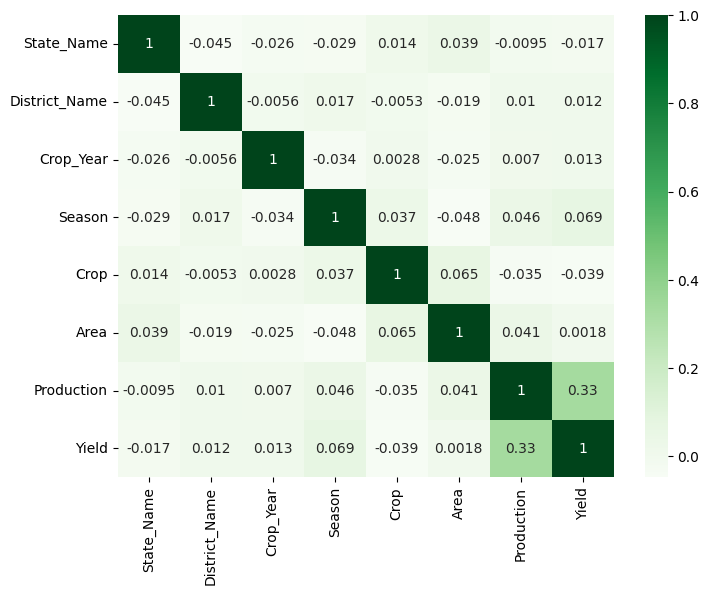

In [11]:
# viewing the correlation heatmap
corr = numerical_df.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'Greens')
plt.show()